Es la puntuación general que recibe la propiedad combinando todas las demás categorías. Suele ser un promedio de todas las valoraciones y refleja la satisfacción general de los huéspedes con su estancia.

Review_scores_rating
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [1]:
import pandas as pd

# Cargar únicamente la columna 'Review_scores_accuracy' del archivo CSV

file_path = "../0_Dataset/Listings.csv"
data = pd.read_csv(file_path, usecols=['review_scores_rating'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'Review_scores_accuracy' existe en el DataFrame
if 'review_scores_rating' in data.columns:
    # Tipo de dato
    tipo_dato = data['review_scores_rating'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['review_scores_rating'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    cantidad_vacios = (data['review_scores_rating'] == '').sum()
    
    # Cantidad de datos únicos
    cantidad_unicos = data['review_scores_rating'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['review_scores_rating'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'review_scores_rating':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'review_scores_rating' no existe en el DataFrame.")

print(data['review_scores_rating'].value_counts())
print(data['review_scores_rating'].unique())

Columna 'review_scores_rating':
 - Tipo de dato: float64
 - Cantidad de nulos: 91405
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 63
 - Cantidad de datos totales: 279712
review_scores_rating
100.0    57458
98.0     13616
97.0     12425
96.0     12261
93.0     10995
         ...  
31.0         1
36.0         1
27.0         1
61.0         1
44.0         1
Name: count, Length: 63, dtype: int64
[100.  98.  99.  93.  96.  97.  95.  90.  88.  92.  80.  94.  60.  91.
  85.  87.  89.  75.  86.  84.  83.  70.  82.  81.  72.  50.  40.  77.
  71.  67.  48.  20.  56.  nan  73.  76.  27.  78.  68.  64.  74.  63.
  66.  47.  65.  53.  52.  79.  69.  57.  58.  33.  30.  54.  45.  55.
  36.  31.  49.  62.  43.  35.  61.  44.]


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

In [2]:
# Cantidad de filas antes de aplicar dropna
total_antes = data['review_scores_rating'].shape[0]

# Filtrar valores válidos
valores_validos = data['review_scores_rating'].dropna()

# Cantidad de filas después de aplicar dropna
total_despues = valores_validos.shape[0]

# Calcular cuántos valores se dropearon
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (dropeados): {valores_dropeados}")

if not valores_validos.empty:
    # Cálculo de estadísticas sin transformar a escala relativa
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    varianza = valores_validos.var()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    mediana = valores_validos.median()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'review_scores_rating':")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo}")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Mediana: {mediana}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar un análisis cuantitativo.")

Cantidad de valores eliminados (dropeados): 91405

Análisis Cuantitativo de 'review_scores_rating':
 - Promedio: 93.41
 - Mínimo: 20.0
 - Máximo: 100.0
 - Desviación estándar: 10.07
 - Varianza: 101.41
 - Q1 (25%): 91.0
 - Q2 / Mediana (50%): 96.0
 - Q3 (75%): 100.0
 - Q4 (100%): 100.0
 - Mediana: 96.0
 - Curtosis (Kurtosis): 19.9988
 - Asimetría (Skewness): -3.7584


CONVERSION DE PUNTUACIONES A ESTRELLAS, ANALISIS ESTADISTICO

In [4]:
# Filtrar valores válidos: eliminar nulos y valores 0
valores_validos = data['review_scores_rating'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Transformar de escala 20–100 a escala 1–5
valores_transformados = ((valores_validos - 20) / (100 - 20)) * 4 + 1

# Análisis estadístico en nueva escala
if not valores_transformados.empty:
    promedio = valores_transformados.mean()
    minimo = valores_transformados.min()
    maximo = valores_transformados.max()
    desviacion = valores_transformados.std()
    q1 = valores_transformados.quantile(0.25)
    q2 = valores_transformados.median()
    q3 = valores_transformados.quantile(0.75)
    q4 = valores_transformados.max()
    varianza = valores_transformados.var()
    kurtosis = valores_transformados.kurtosis()
    skewness = valores_transformados.skew()

    print("Análisis Cuantitativo de 'review_scores_rating' (escala transformada 1 a 5):")
    print(f" - Promedio: {promedio:.2f}")
    print(f" - Mínimo: {minimo:.2f}")
    print(f" - Máximo: {maximo:.2f}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1:.2f}")
    print(f" - Q2 / Mediana (50%): {q2:.2f}")
    print(f" - Q3 (75%): {q3:.2f}")
    print(f" - Q4 (100%): {q4:.2f}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Análisis Cuantitativo de 'review_scores_rating' (escala transformada 1 a 5):
 - Promedio: 4.67
 - Mínimo: 1.00
 - Máximo: 5.00
 - Desviación estándar: 0.50
 - Q1 (25%): 4.55
 - Q2 / Mediana (50%): 4.80
 - Q3 (75%): 5.00
 - Q4 (100%): 5.00
 - Varianza: 0.2535
 - Curtosis (Kurtosis): 19.9988
 - Asimetría (Skewness): -3.7584


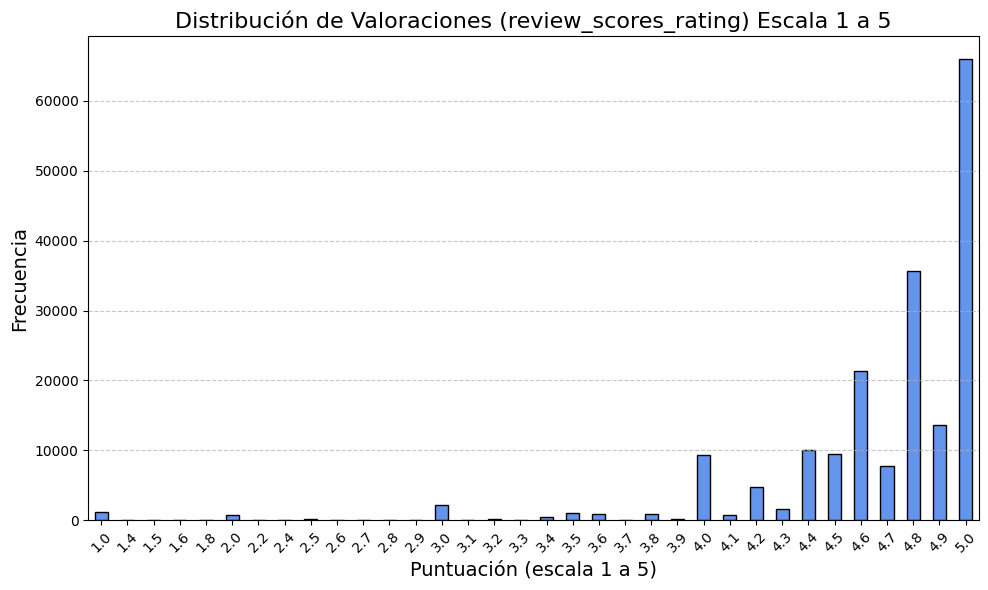

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar valores válidos: eliminar nulos y ceros
valores_validos = data['review_scores_rating'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Transformar de escala 20–100 a escala 1–5
valores_transformados = ((valores_validos - 20) / (100 - 20)) * 4 + 1

# Redondear los valores a 1 decimal (por ejemplo: 3.2, 4.5...)
valores_redondeados = valores_transformados.round(1)

# Contar frecuencia por puntuación redondeada
frecuencia = valores_redondeados.value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.title('Distribución de Valoraciones (review_scores_rating) Escala 1 a 5', fontsize=16)
plt.xlabel('Puntuación (escala 1 a 5)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Grafica

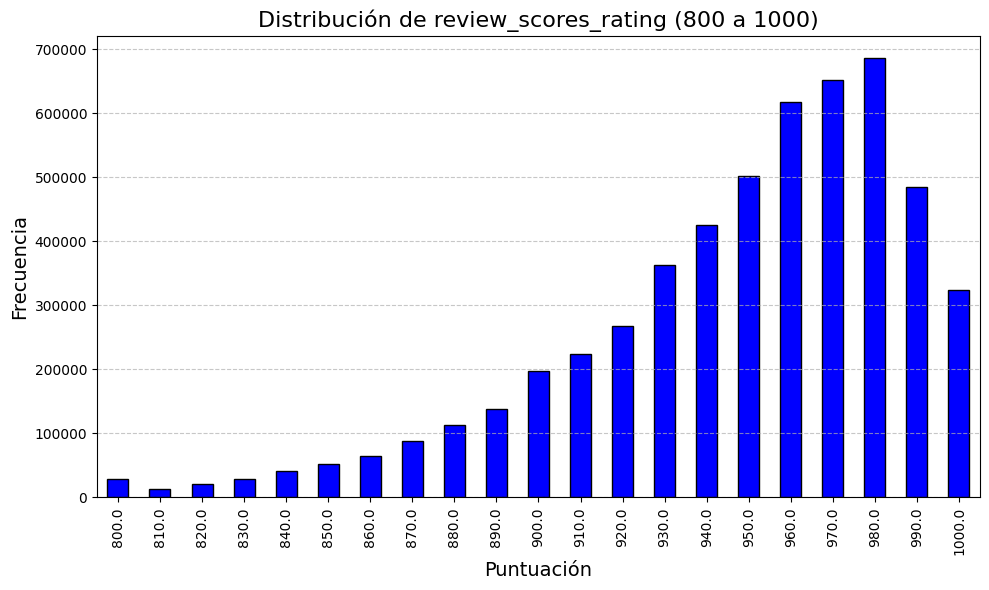

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'review_scores_rating' del archivo CSV
file_path = "../../AirBnB_V2/0_Dataset/Combined_Dataset.csv"
data = pd.read_csv(file_path, usecols=['review_scores_rating'], delimiter=';')
# Verificar si la columna 'review_scores_rating' existe en el DataFrame
if 'review_scores_rating' in data.columns:
    # Filtrar valores entre 800 y 1000
    data_filtered = data[(data['review_scores_rating'] >= 800) & (data['review_scores_rating'] <= 1000)]

    # Contar la frecuencia de cada valor y ordenar por índice (puntuación)
    value_counts = data_filtered['review_scores_rating'].value_counts().sort_index()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='blue', edgecolor='black')
    plt.title('Distribución de review_scores_rating (800 a 1000)', fontsize=16)
    plt.xlabel('Puntuación', fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()
else:
    print("La columna 'review_scores_rating' no existe en el DataFrame.")

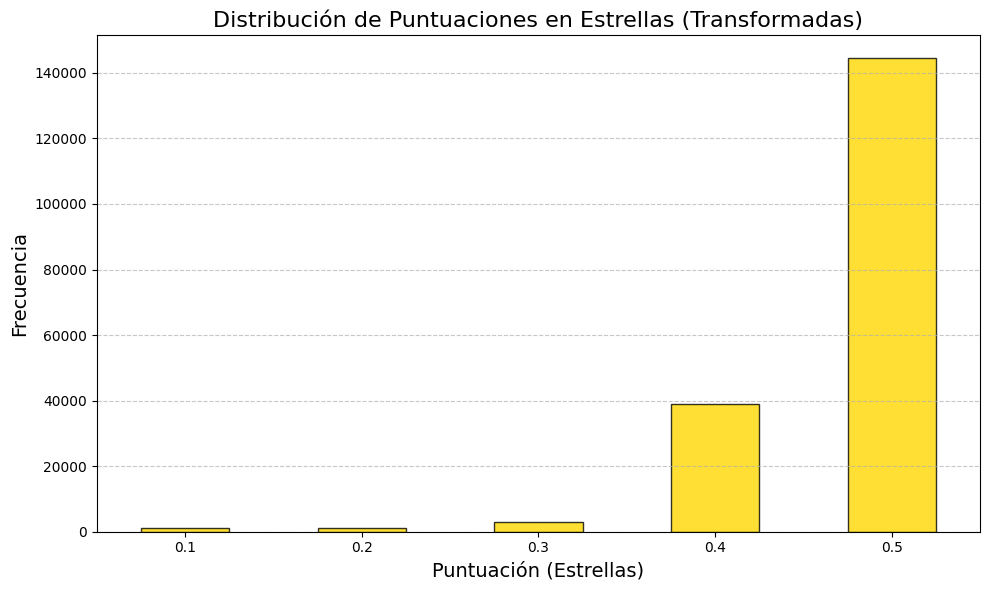

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar únicamente la columna 'review_scores_rating' del archivo CSV

# Verificar si la columna 'review_scores_rating' existe en el DataFrame
if 'review_scores_rating' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['review_scores_rating'].dropna()

    # Transformar los valores de 200-1000 al rango de 1-5 estrellas
    estrellas = 1 + (valores_validos - 200) * (4 / 800)  # Escalar al rango 1-5

    # Redondear las puntuaciones a 0.5 para agruparlas en estrellas (1, 1.5, ..., 5)
    estrellas_redondeadas = estrellas.round(1)

    # Contar la frecuencia de cada puntuación
    frecuencia = estrellas_redondeadas.value_counts().sort_index()

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    frecuencia.plot(kind='bar', color='gold', edgecolor='black', alpha=0.8)
    plt.title("Distribución de Puntuaciones en Estrellas (Transformadas)", fontsize=16)
    plt.xlabel("Puntuación (Estrellas)", fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_rating' no existe en el DataFrame.")

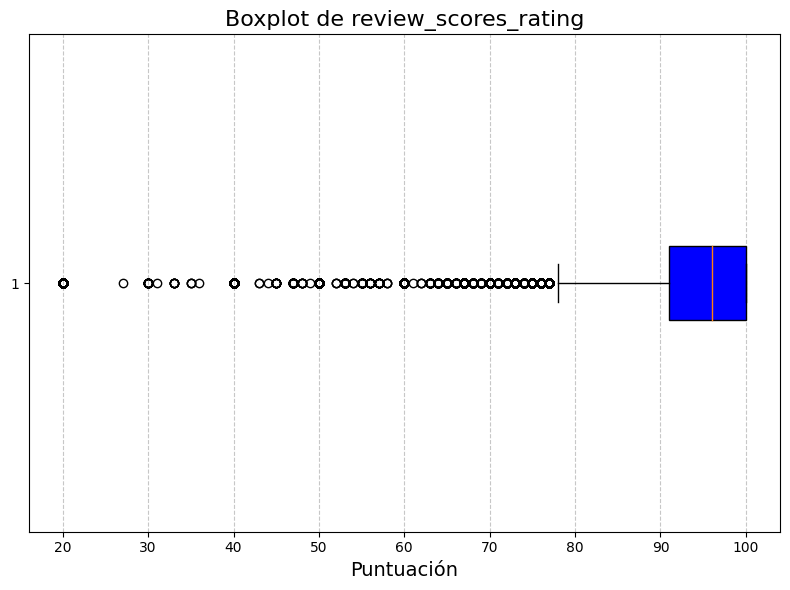

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Verificar si la columna 'review_scores_rating' existe en el DataFrame
if 'review_scores_rating' in data.columns:
    # Filtrar valores válidos (eliminar nulos)
    valores_validos = data['review_scores_rating'].dropna()

    # Crear el gráfico boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(valores_validos, vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    plt.title('Boxplot de review_scores_rating', fontsize=16)
    plt.xlabel('Puntuación', fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'review_scores_rating' no existe en el DataFrame.")